# Customer Churn Analysis

Customer churn is when a company's customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be acheived with good customer service and products. But the most effective way for a company to prevent attrition of customers can be used to build churn prediction models. Knowing who is most likely to dectect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunication sector, as the barriers focused marketing efforts on that subset of their customer base.

Preventing Customer Churn is critically important to the telecommunications sector, as the barrier to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the Aim of building and comparing serveral customer churn prediction models.

In [41]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('Customer Churn Analysis')
df = pd.DataFrame(data= df)

In [43]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [44]:
df.shape

(7043, 21)

In [45]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
#If errors=‘coerce’, then invalid parsing will be set as NaN.
df.TotalCharges = pd.to_numeric(df.TotalCharges,errors='coerce')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [50]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,1602-IJQQE,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [51]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
#Splitting into Numerical and Categorical variables
#Converting Churn column values from 'Yes or No' to '0 or 1'
df['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df['Churn'].replace(to_replace='No',value=0,inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [55]:
pd.set_option('display.max_columns', None)

In [56]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [119]:
df_col=df[['Churn','tenure','MonthlyCharges','TotalCharges']]

In [120]:
df_col.head()

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65


In [121]:
df_cat=df[['Churn','customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

In [122]:
#customerID has unique value for each of the 7032 records and visualizing for univariate and Bivariate will not make any sense
df_cat = df_cat.drop(columns='customerID', axis =1)

# EDA and Data Visualisation

In [123]:
#Univariate Analysis
#Attrition proportion - using Doughnut chart
Y_count = len(df[df['Churn'] == 1])
N_count = len(df[df['Churn'] == 0])

In [124]:
# create data
names='Yes', 'No',
size=[Y_count,N_count]

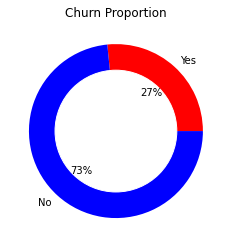

In [125]:
# Create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')   
plt.pie(size, labels=names, colors=['Red','Blue'],autopct='%1.0f%%')  
p=plt.gcf()
p.gca().add_artist(circle)
ax = plt.axes()
ax.set_title("Churn Proportion")
plt.show()


Insight: Insight: It is an Imbalanced dataset. Class distribution is not equal or close to equal, and is instead biased or skewed.

In [128]:
df_col.head()

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65


Graphs for Churn:
Minmum value of Churn is :0
Maximum value of Churnis:1




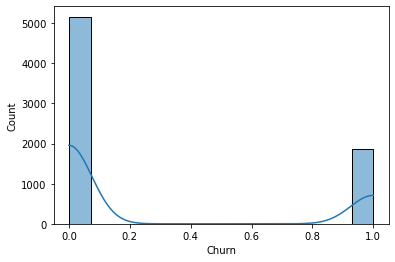

Graphs for tenure:
Minmum value of tenure is :1
Maximum value of tenureis:72




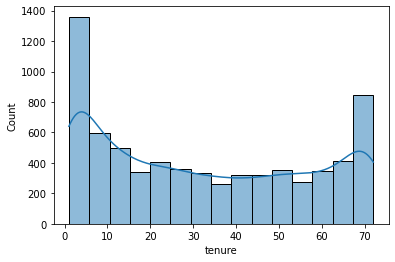

Graphs for MonthlyCharges:
Minmum value of MonthlyCharges is :18
Maximum value of MonthlyChargesis:118




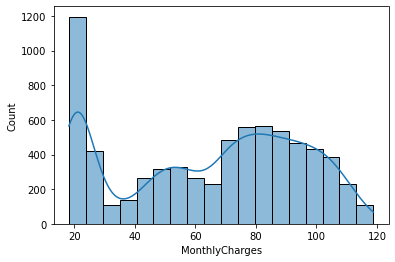

Graphs for TotalCharges:
Minmum value of TotalCharges is :18
Maximum value of TotalChargesis:8684




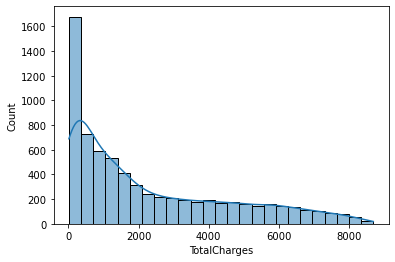

In [126]:
#histogram with kde for analysing teh distribution of the data
for i in df_col:
  min = df_col[i].min()
  max = df_col[i].max()
  print("Graphs for %s:\nMinmum value of %s is :%d\nMaximum value of %sis:%d\n\n" %(i,i,min,i,max))
  sns.histplot(df_col, x=i, kde=True)
  plt.show()

# Categorical Features

In [131]:
df_cat.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,1,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,1,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check




Graphs for Churn:
Total_no. of categories:2


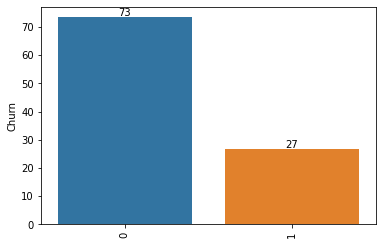



Graphs for gender:
Total_no. of categories:2


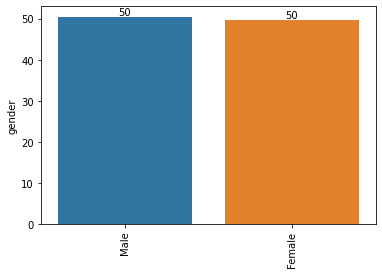



Graphs for SeniorCitizen:
Total_no. of categories:2


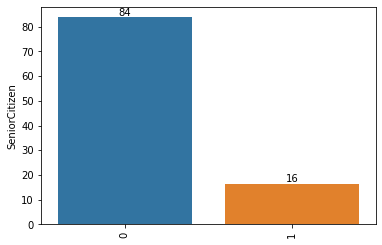



Graphs for Partner:
Total_no. of categories:2


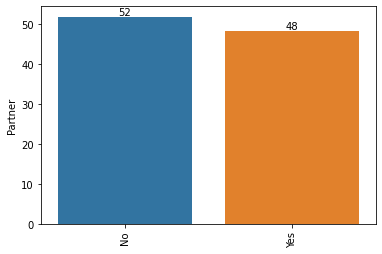



Graphs for Dependents:
Total_no. of categories:2


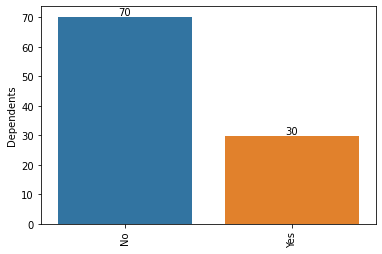



Graphs for PhoneService:
Total_no. of categories:2


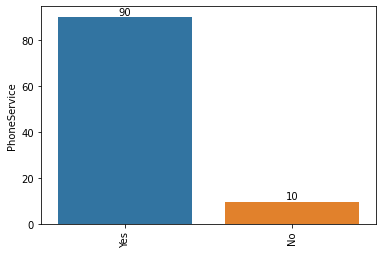



Graphs for MultipleLines:
Total_no. of categories:3


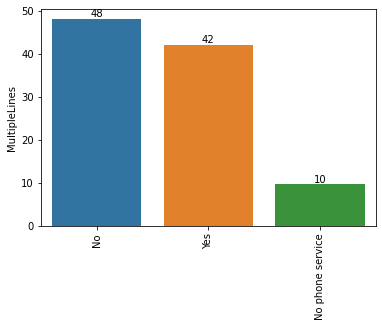



Graphs for InternetService:
Total_no. of categories:3


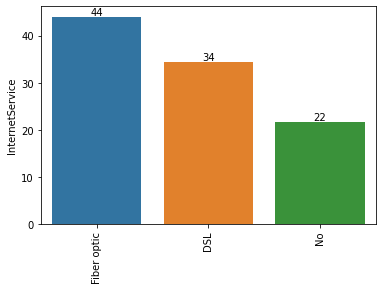



Graphs for OnlineSecurity:
Total_no. of categories:3


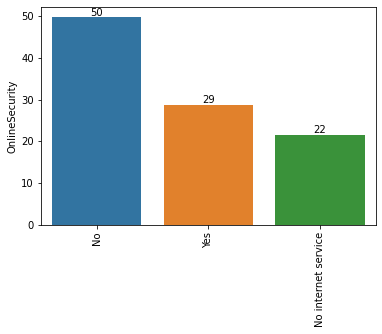



Graphs for OnlineBackup:
Total_no. of categories:3


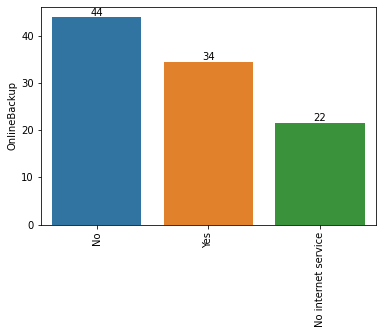



Graphs for DeviceProtection:
Total_no. of categories:3


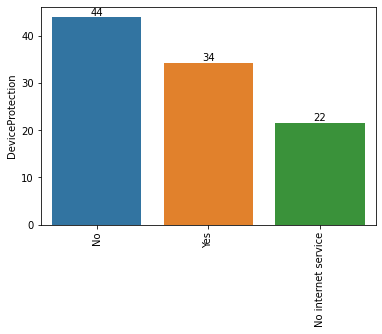



Graphs for TechSupport:
Total_no. of categories:3


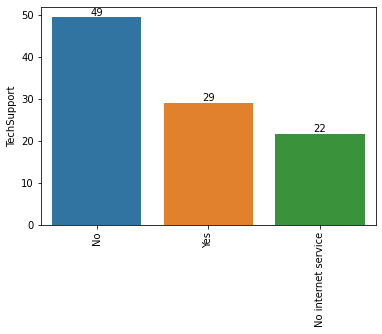



Graphs for StreamingTV:
Total_no. of categories:3


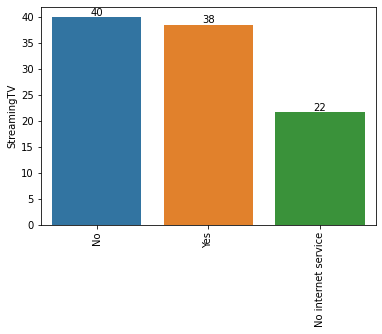



Graphs for StreamingMovies:
Total_no. of categories:3


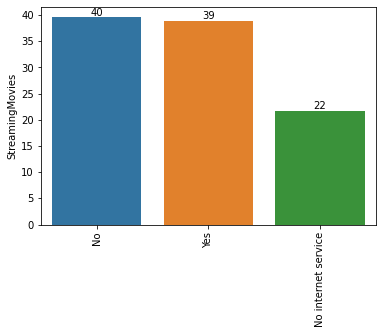



Graphs for Contract:
Total_no. of categories:3


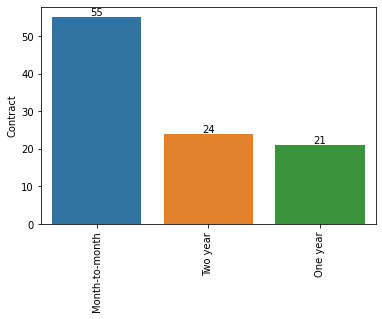



Graphs for PaperlessBilling:
Total_no. of categories:2


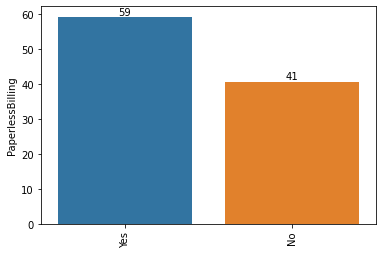



Graphs for PaymentMethod:
Total_no. of categories:4


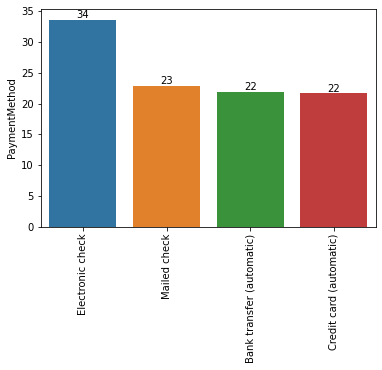

In [71]:
#barplot: One axis is the category axis indicating the category, 
#while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar.

for i in df_cat:   
    df_col = df_cat[i].value_counts()*100/len(df_cat)
    print("\n\nGraphs for %s:\nTotal_no. of categories:%d" %(i, len(df_col)))
    chart = sns.barplot(x= df_col.index, y= df_col)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)   #rotating labels for better readability
    for bar in chart.patches:  #adding annotation to the graphs
      chart.annotate(format(bar.get_height(), '.0f'), 
      (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
       ha = 'center', va = 'center', 
       xytext = (0, 5), 
       textcoords = 'offset points')
      
    plt.show()

In [132]:
#correlation matrix - numerical data
correlation_matrix = df_col.corr()
correlation_matrix.to_csv("Correlation_mat-Churn.csv")
correlation_matrix

,Churn,tenure,MonthlyCharges,TotalCharges
Churn,1.000000,-0.354049,0.192858,-0.199484
tenure,-0.354049,1.000000,0.246862,0.825880
MonthlyCharges,0.192858,0.246862,1.000000,0.651065
TotalCharges,-0.199484,0.825880,0.651065,1.000000


<AxesSubplot:>

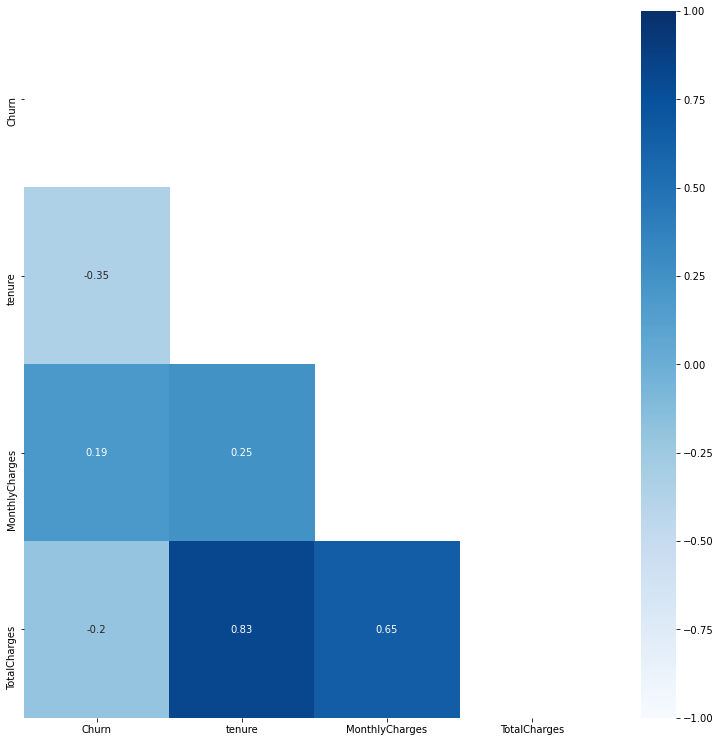

In [133]:
plt.figure(figsize=(13,13))
matrix = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix,annot=True,mask = matrix,cmap="Blues", vmin=-1,vmax=1,center=0)

Insights:
    
Churn and Tenure are negatively correlated, so lesser months they stay more is the churn rate
Though Monthly charge is positively correlated, Total charges is negatively correlated with churn


# Categorical Associations

In [82]:
#changing all catg to num(dummy encoding)
df_cat_encoded = pd.get_dummies(df_cat)

In [81]:
#categorical association -csv
cat_association = df_cat_encoded.corr()
cat_association.to_csv("Categorical_associations-Churn.csv")
cat_association

,Churn,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,1.000000,0.150541,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,-0.011691,0.011691,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
SeniorCitizen,0.150541,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
gender_Female,0.008545,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,-0.007515,0.008883,-0.007584,0.011189,-0.004745,-0.010859,-0.004745,0.016328,-0.008605,-0.004745,0.013093,0.003163,-0.004745,0.000807,-0.003815,-0.004745,0.008507,-0.003088,-0.004745,0.007124,-0.006078,-0.004745,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.008545,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,0.149982,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,0.018397,-0.142561,0.001043,-0.001235,0.000286,0.129394,0.000286,-0.143346,0.135626,0.000286,-0.141849,0.146702,0.000286,-0.153556,0.108875,0.000286,-0.120206,0.123394,0.000286,-0.124483,0.117488,0.000286,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,-0.149982,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.163128,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,-0.001078,0.024307,-0.051593,0.164101,-0.138383,0.186979,-0.138383,-0.080786,0.137421,-0.138383,-0.023639,0.128053,-0.138383,-0.013900,0.171164,-0.138383,-0.063053,0.099912,-0.138383,0.016499,0.078245,-0.138383,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448
Dependents_Yes,-0.163128,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,0.001078,-0.0

<AxesSubplot:>

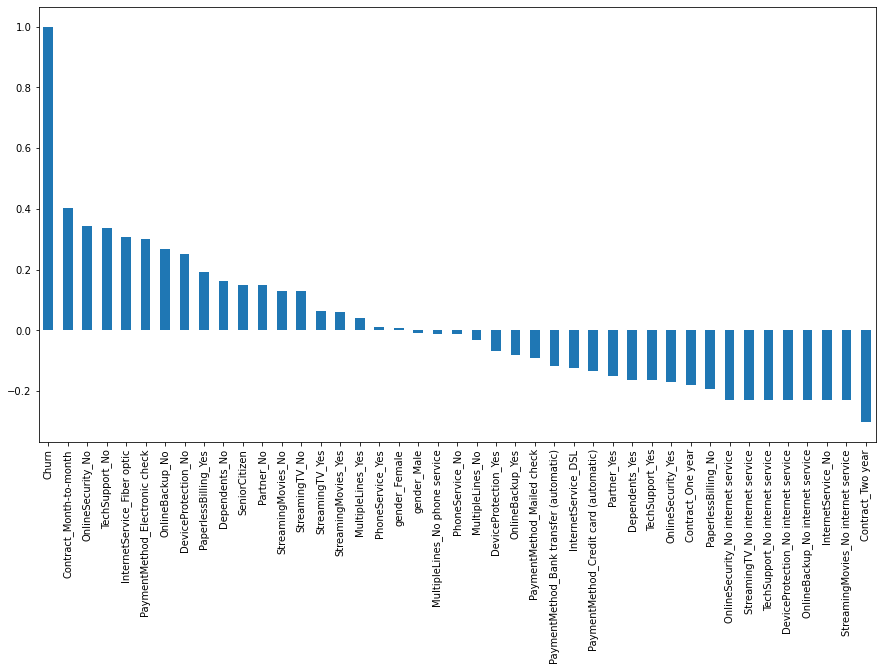

In [86]:
plt.figure(figsize=(15,8))
cat_association['Churn'].sort_values(ascending = False).plot(kind='bar')

Insights:
Contract 2 yrs and 1 yrs are negatively correlated with churn while Month to month contract is positively correlated
Services like OnlineSecurity,StreamingTV,Techsupport,DeviceProtection,OnlineBackup and StreamingMovies withn No internet service is negatively correlated
Payments methods: Other than electronic check other payment methods are negatively correlated
Presence of Partner, Dependents and TechSupport has negative correlation with churn

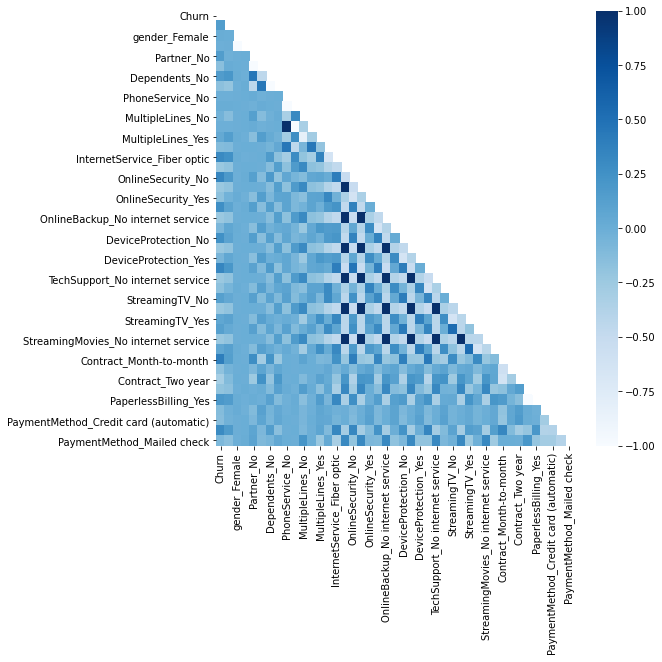

In [87]:
plt.figure(figsize=(8,8))
matrix = np.triu(cat_association)
sns.heatmap(cat_association, cmap="Blues", mask= matrix)
plt.savefig("Categorical_associations-Churn")

In [89]:
df_cat.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

The analyse can be divided into 3 sections:
Demographics - Gender, Senior Citizen , Partner , Dependents
Services Availed-

a. PhoneService - Yes/ No

If yes, MultipleLines - Yes/No

b. InternetService - Yes/ No

If yes, OnlineSecurity,OnlineBackup, DeviceProtection,TechSupport,StreamingTV,StreamingMovies
Payment methods: Contract, PaperlessBilling, PaymentMethod

In [90]:
(pd.crosstab(df_cat['Churn'],df_cat['gender'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

gender,Female,Male,Total%
Churn,,,
0,36.2,37.2,73.4
1,13.4,13.2,26.6
Total%,49.5,50.5,100.0


Insights:

Gender ratio of the customers is equal

The churn rate in both the genders are approx equal - 26% (M) and 27% (F)


In [93]:
(pd.crosstab(df_cat['Churn'],df_cat['SeniorCitizen'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

SeniorCitizen,0,1,Total%
Churn,,,
0,64.0,9.5,73.4
1,19.8,6.8,26.6
Total%,83.8,16.2,100.0


Insights:
    
Out of 16.2 of senior citizens,the churn rate is 42% Whereas for customers who are not senior citizens, churn rate is 24%

We need to analyse why senior citizen are more likely to be churned

In [94]:
(pd.crosstab(df_cat['Churn'],df_cat['Partner'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

Partner,No,Yes,Total%
Churn,,,
0,34.7,38.7,73.4
1,17.1,9.5,26.6
Total%,51.7,48.3,100.0


Insights:
    
Churn rate for customers who don't have parteners are high: 33% Churn rate for customers with partners: 19.6%

Nearly the churn rate of with partners is twice as churn rate without parnter

In [95]:
(pd.crosstab(df_cat['Churn'],df_cat['Dependents'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

Dependents,No,Yes,Total%
Churn,,,
0,48.2,25.2,73.4
1,21.9,4.6,26.6
Total%,70.2,29.8,100.0


Insights:
    
No Dependents: Churn rate = 31%
    
Yes Dependents : Churn rate = 15%
    
The churn rate for no dependents is twice as that of customers with dependents

In [96]:
(pd.crosstab(df_cat['Churn'],df_cat['PhoneService'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

PhoneService,No,Yes,Total%
Churn,,,
0,7.3,66.2,73.4
1,2.4,24.2,26.6
Total%,9.7,90.3,100.0


Insights:
    
Churn rate for people with PhoneService: 27%
    
Churn rate for people without PhoneService: 25%

In [97]:
(pd.crosstab(df_cat['Churn'],df_cat['MultipleLines'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

MultipleLines,No,No phone service,Yes,Total%
Churn,,,,
0,36.1,7.3,30.1,73.4
1,12.1,2.4,12.1,26.6
Total%,48.1,9.7,42.2,100.0


Insights:
    
Of the 90% of people having phone service,

Churn rate for people with MultipleLines: 29%
    
Churn rate for people No MultipleLines: 25%
    
We need to analyze why people with Multiple line have slight high churn rate

In [98]:
(pd.crosstab(df_cat['Churn'],df_cat['InternetService'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

InternetService,DSL,Fiber optic,No,Total%
Churn,,,,
0,27.8,25.6,20.0,73.4
1,6.5,18.4,1.6,26.6
Total%,34.4,44.0,21.6,100.0


Insights:
    
The below are the churn rate respective to the different internet options

DSL - 19%
Fiber Optic - 42%
With No internet - 7%

Customers with Fiber optic connection are more likely to be churned as they have high churn rate as 42%

In [99]:
(pd.crosstab(df_cat['Churn'],df_cat['OnlineSecurity'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

OnlineSecurity,No,No internet service,Yes,Total%
Churn,,,,
0,29.0,20.0,24.5,73.4
1,20.8,1.6,4.2,26.6
Total%,49.7,21.6,28.7,100.0


Insights:
    
The below are the churn rate for Online Security

Online Security - Yes - 14.6%
Online Security - No - 41.8%
With No internet - 7.4%

Customers with No Online Security options are more likely to be churned as they have high churn rate as 42%

In [101]:
(pd.crosstab(df_cat['Churn'],df_cat['OnlineBackup'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

OnlineBackup,No,No internet service,Yes,Total%
Churn,,,,
0,26.4,20.0,27.0,73.4
1,17.5,1.6,7.4,26.6
Total%,43.9,21.6,34.5,100.0


Insights:
    
The below are the churn rate for Online Security

Online Backup - Yes - 21.44%
Online Backup - No - 40%
With No internet - 7.4%

Customers with No Online Backup options are more likely to be churned as they have high churn rate as 40%

In [102]:
(pd.crosstab(df_cat['Churn'],df_cat['DeviceProtection'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

DeviceProtection,No,No internet service,Yes,Total%
Churn,,,,
0,26.8,20.0,26.6,73.4
1,17.2,1.6,7.8,26.6
Total%,44.0,21.6,34.4,100.0


Insights:
    
The below are the churn rate for Device protection

Device protection - Yes - 21.8%
Device protection - No - 39%
With No internet - 7.4%

Customers with No Device protection options are more likely to be churned as they have high churn rate as 39%

In [103]:
(pd.crosstab(df_cat['Churn'],df_cat['TechSupport'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

TechSupport,No,No internet service,Yes,Total%
Churn,,,,
0,28.8,20.0,24.6,73.4
1,20.6,1.6,4.4,26.6
Total%,49.4,21.6,29.0,100.0


Insights:
    
The below are the churn rate for Tech Support

Tech Support - Yes - 21.8%
Tech Support - No - 39%
With No internet - 7.4%

Customers with No Device protection options are more likely to be churned as they have high churn rate as 39%

In [104]:
(pd.crosstab(df_cat['Churn'],df_cat['StreamingTV'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

StreamingTV,No,No internet service,Yes,Total%
Churn,,,,
0,26.6,20.0,26.9,73.4
1,13.4,1.6,11.6,26.6
Total%,39.9,21.6,38.4,100.0


Insights:
    
Churn rate for - No StreamingTV : 33.5%
Churn rate for - StreamingMovies : 30.2%
Churn rate for - No internet Service : 7.4%

In [106]:
(pd.crosstab(df_cat['Churn'],df_cat['StreamingMovies'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

StreamingMovies,No,No internet service,Yes,Total%
Churn,,,,
0,26.2,20.0,27.2,73.4
1,13.3,1.6,11.6,26.6
Total%,39.5,21.6,38.8,100.0


Insights:
    
Churn rate for - No StreamingMovies : 33.4%
Churn rate for - StreamingMovies : 29.8%
Churn rate for - No internet Service : 7.4%

In [107]:
(pd.crosstab(df_cat['Churn'],df_cat['Contract'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

Contract,Month-to-month,One year,Two year,Total%
Churn,,,,
0,31.6,18.6,23.3,73.4
1,23.5,2.4,0.7,26.6
Total%,55.1,20.9,24.0,100.0


Insights:
    
Majority of the customers opt for Month to Month plan(More than 50%) From that, chance of churn is pretty high - 43%
One year churn rate- 11.4%
Two year churn rate- 2.9%

In [109]:
(pd.crosstab(df_cat['Churn'],df_cat['PaperlessBilling'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

PaperlessBilling,No,Yes,Total%
Churn,,,
0,34.1,39.4,73.4
1,6.7,19.9,26.6
Total%,40.7,59.3,100.0


Insights:
    
Out of 59% of the customers with Paperless Billing, 33% is the Churn rate
Out of 41% of the customers who don't opt Paperless Billing, 17% is the churn rate

In [110]:
(pd.crosstab(df_cat['Churn'],df_cat['PaymentMethod'],normalize=True,margins=True, margins_name="Total%")*100).round(1)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Total%
Churn,,,,,
0,18.3,18.3,18.4,18.4,73.4
1,3.7,3.3,15.2,4.4,26.6
Total%,21.9,21.6,33.6,22.8,100.0


Insights:
    
Churn rate for Electronic Check payment is 45%
Whereas for rest of the payment methods the churn rate is of 15 to 20% (19.2%,15.2%, 16.8%)

Overall Inference:
    
1.Churn rate on both the gender is almost the same (26% (M) and 27% (F)). So gender is not influnetial factor

2.Though the customer base of Senior Citizen is of only 16.2%, the churn rate is only 42%

3.Customers without partners and Dependents are more likely to churn - with churn rate 31% - 33%

4.10% of the customers have not opted for Phone services. Churn rate for with (27%) and without PhoneService(25%) has difference of 2%

5.Customers with Multiples lines are more likely to churn with Churn rate of 29%

6.22% of the customers have not opted for Internet services And among the rest of the 78%, Most of them have opted Fiber Optic and yet are not satisfied with it - 42% are tend to churn

7.Contract: The more lengther plan they choose , less likely are they to churn as Month to Month plan has 43% churn rate and 2 yrs plan has 2.9%

8.Paperless Billing has higher churn rate- So Billing might have been send using email or Credit card user

9.Payment Method-Customers using eChecks are more likely to be churned - 45%

Services Availed:
    
Of all the services provided wrt Internet - 21.6% of customers don't have internet

Of all the services done, customers who haven't opted the services have churned max.

1.OnlineSecurity : 42% churn rate for customers without Online security
2.Online Backup : 40% churn rate for customers without Online Backup
3.Device protection:
4.Tech Support:
5.Streaming Movies:
6.Streaming TV:

# Barplots - Cat vs Cat(Churn)

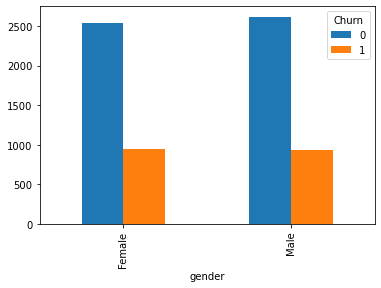

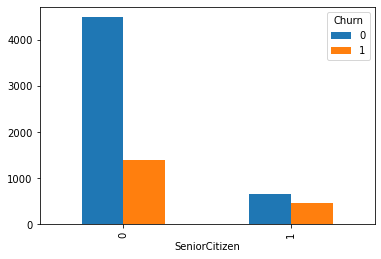

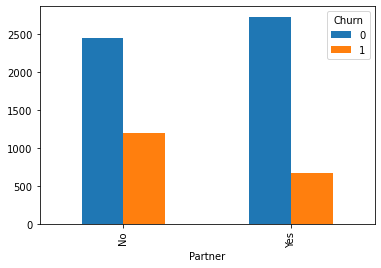

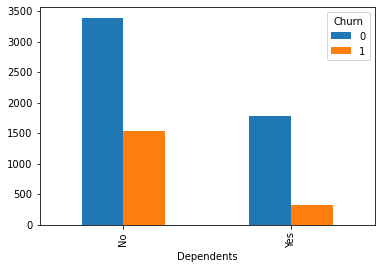

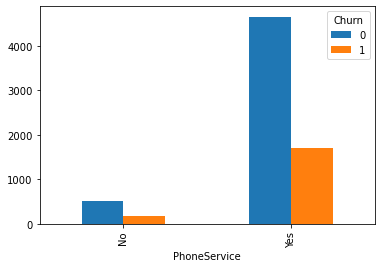

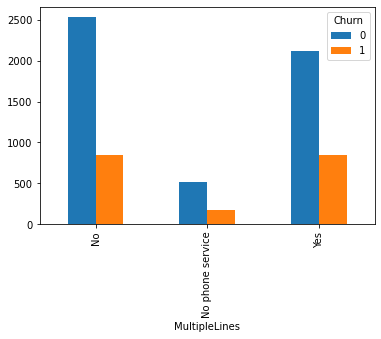

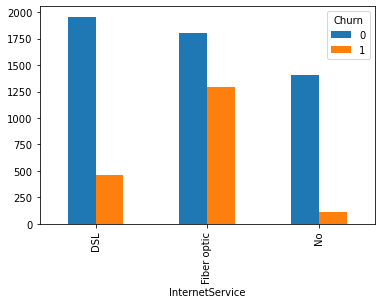

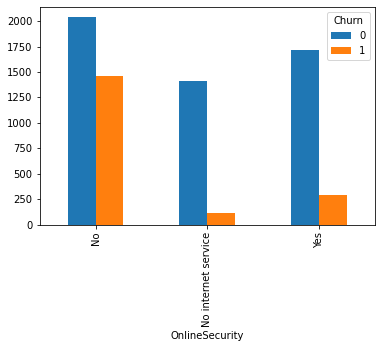

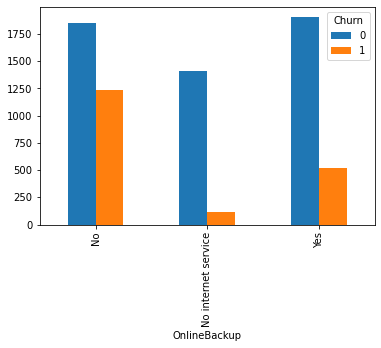

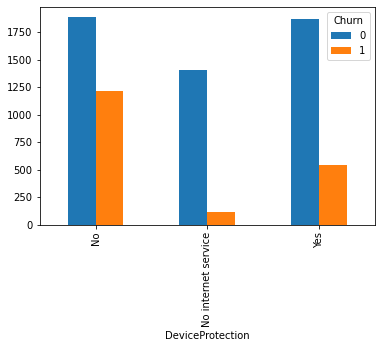

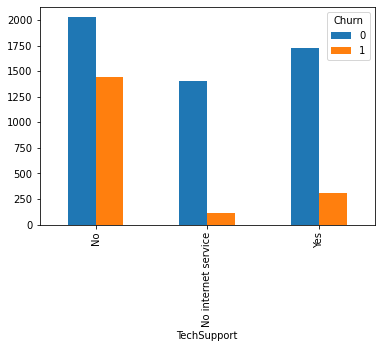

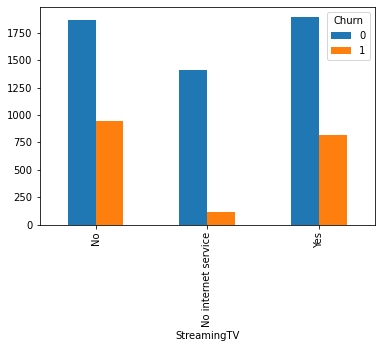

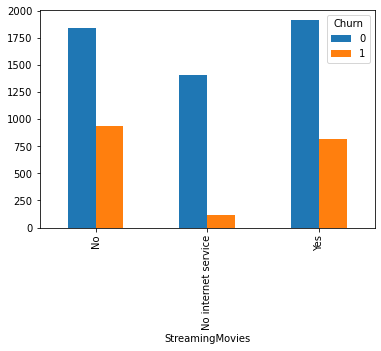

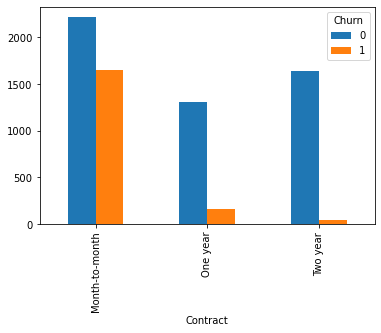

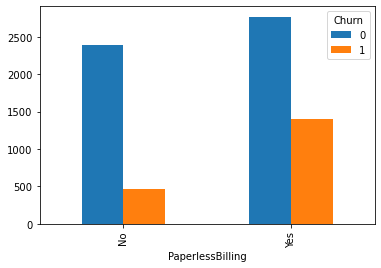

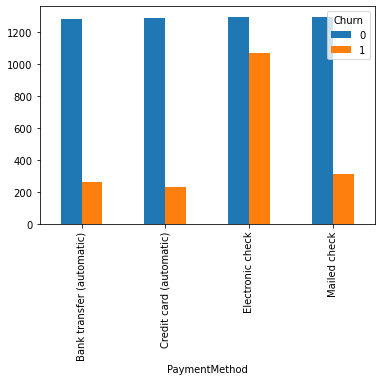

In [112]:
x_cat = df_cat.drop(['Churn'],axis =1)
for i in x_cat:
  pd.crosstab(x_cat[i], df_cat['Churn']).plot.bar()
  plt.show()
  print("\n\n\n")

# Boxplots - Numerical vs Cat (Churn)¶

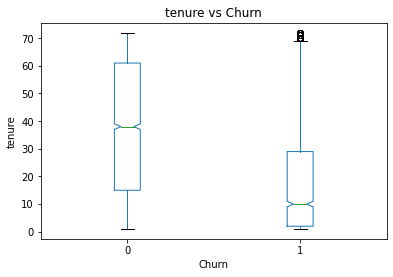

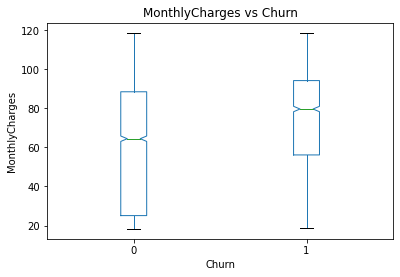

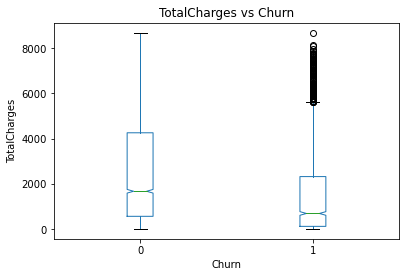

In [136]:
x_num = df_col.drop(['Churn'], axis=1)

for i in x_num:
  df_col.boxplot(column= i, by="Churn", notch = True, grid=False, vert = True )
  plt.suptitle('')
  plt.title('%s vs Churn'%i)
  plt.ylabel("%s"%i)
  plt.show()
  print("\n\n\n")

Insights:
    
The lesser the tenure the more likely to churn
MonthlyCharges are slightly left skewed, customers who have churned have paid more compartively.
The lesser the totalcharges more is the churn rate

# Outlier Analysis

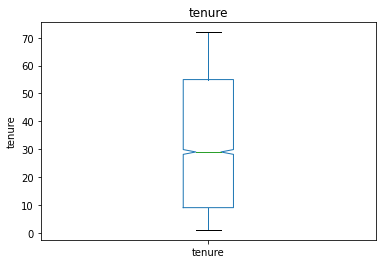

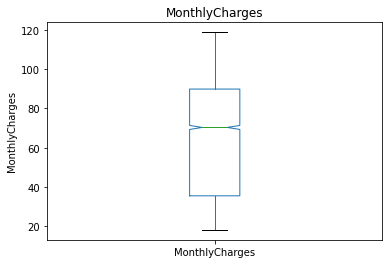

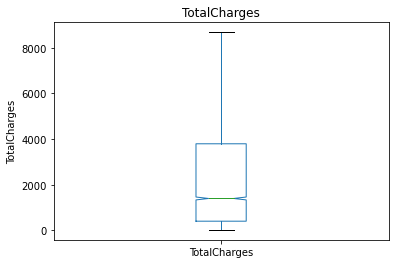

In [138]:
x_num = df_col.drop(['Churn'], axis=1)

for i in x_num:
  df_col.boxplot(column= i,notch = True, grid=False, vert = True )
  plt.suptitle('')
  plt.title('%s'%i)
  plt.ylabel("%s"%i)
  plt.show()
  print("\n\n\n")

there are no outlier present in dataset

In [139]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
